In [34]:
import pandas as pd

In [ ]:
df=pd.read_csv("Mall_Customers.csv")

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
categorized=df.select_dtypes(include='object')

In [38]:
categorized.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [39]:
numerical=df.select_dtypes(exclude='object')

In [40]:
numerical.shape

(200, 4)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

for i in categorized:
    df[i]=le.fit_transform(df[i])
    


In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [45]:
se=StandardScaler()
X_standard=se.fit_transform(df)

In [46]:
te=TSNE(n_components=2,random_state=42)
X_tsen=te.fit_transform(X_standard)

In [ ]:
from sklearn.cluster import KMeans
inertias = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_tsen)
    inertias.append((km.inertia_,k))


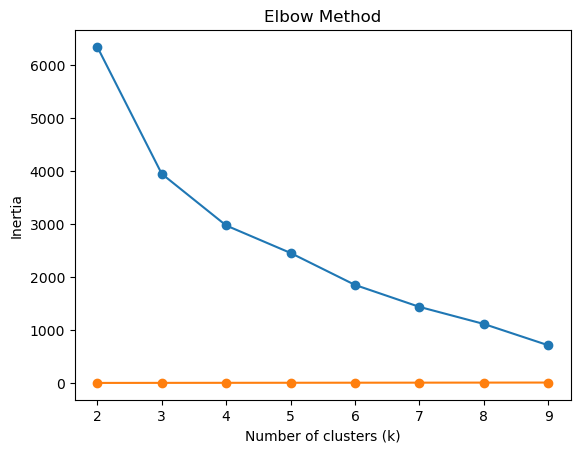

In [48]:
import matplotlib.pyplot as plt
ks = range(2, 10)
plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
km = KMeans(n_clusters=3,random_state=42)
labels = km.fit_predict(X_tsen)

In [50]:
X_tsen[:,0]

array([  6.3536897 ,   7.652779  , -11.9915905 ,  -9.198654  ,
       -10.592161  ,  -8.994442  , -12.040641  ,  -8.501727  ,
        -3.1950724 ,  -9.299338  ,  -3.0335798 ,  -9.11478   ,
       -12.417151  ,  -8.732173  ,  -2.3296201 ,   7.511368  ,
       -10.741255  ,   6.974708  ,  -2.112803  ,  -9.001172  ,
        -1.7474043 ,   7.023299  , -12.2425165 ,   6.673815  ,
       -12.129494  ,   7.218529  , -10.9675665 ,   5.9893155 ,
       -10.882347  ,  -8.121759  ,  -3.0103686 ,  -8.1817465 ,
        -2.8737717 ,   8.019803  , -11.80582   ,  -7.8687787 ,
       -11.498019  ,  -8.465466  , -10.494602  ,  -7.6579957 ,
       -10.899498  ,   7.824729  ,  -0.87184536,  -8.140151  ,
       -10.9445715 ,  -7.706838  , -10.086205  ,  -8.122498  ,
        -8.432195  ,  -8.556273  ,  -9.736466  ,   5.5735555 ,
        -7.760724  ,  -0.25178733,  -9.733329  ,  -0.16381013,
        -9.561525  ,  -0.338036  ,  -7.204262  ,   0.08286488,
        -0.03329174,   6.4490614 , -10.011457  ,  -9.44

In [51]:
len(X_tsen[0])

2

In [52]:
data_visualize=pd.DataFrame(X_tsen,columns=['tsne1','tsne2'])

In [53]:
data_visualize['clusters']=km.labels_

In [54]:
data_visualize

,tsne1,tsne2,clusters
0,6.353690,11.578399,0
1,7.652779,10.935802,0
2,-11.991590,-6.789187,2
3,-9.198654,-10.579618,2
4,-10.592161,-7.039790,2
...,...,...,...
195,4.975948,-4.310716,1
196,-0.611703,-0.331454,1
197,7.637414,-0.127828,1
198,0.635229,2.929139,1


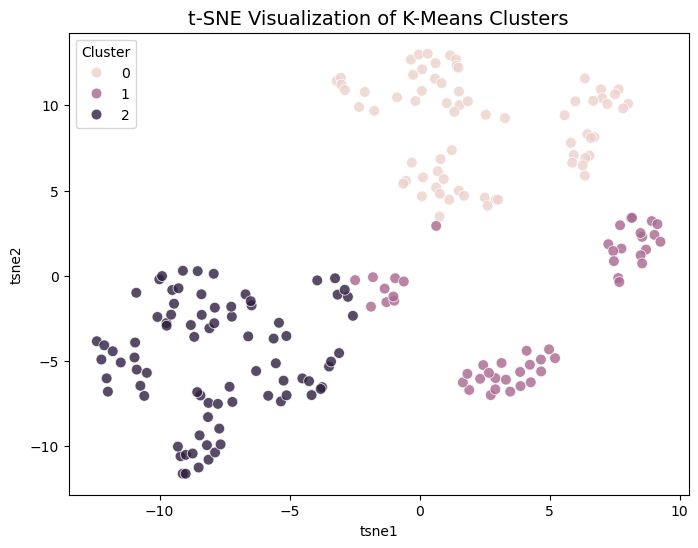

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='tsne1', y='tsne2', hue='clusters',data=data_visualize,s=60, alpha=0.8)
plt.title('t-SNE Visualization of K-Means Clusters', fontsize=14)
plt.legend(title='Cluster')
plt.show()


In [56]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=42)

In [57]:
X_pca=pca.fit_transform(df)

In [ ]:
km=KMeans(n_clusters=3,random_state=42)
labels=km.fit_predict(X_pca)

In [59]:
data_pca=pd.DataFrame(X_pca,columns=['pca1','pca2'])
data_pca['Clusters']=km.labels_

In [60]:
data_pca

,pca1,pca2,Clusters
0,-109.383941,-5.478454,2
1,-108.202857,34.931765,2
2,-107.376292,-37.840872,2
3,-106.007807,30.562696,2
4,-104.980323,-7.296747,2
...,...,...,...
195,111.652574,27.964645,1
196,114.615358,-24.017825,1
197,115.911505,23.729967,1
198,120.939935,-30.859889,1


In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='Clusters',data=data_pca)
plt.title('PCA Visualization of K-Means Clusters', fontsize=14)
plt.legend(title='Cluster')
plt.show()

In [ ]:
df['clusters']=km.labels_

In [ ]:
df.head()

In [ ]:
grouping=df.groupby('clusters').mean()

In [ ]:
for i, row in grouping.iterrows():
    print(f"\n Cluster {i} Persona:")
    print(f"Age: {row['Age']:.1f} yrs | Income: ${row['Annual Income (k$)']:.0f} | Spending Score: {row['Spending Score (1-100)']:.1f}")
